In [1]:
import numpy as np
import jax.numpy as jnp
import jax

from modeling.SIR_model import SIR_model

model = SIR_model(beta=0.5, gamma=0.04)

times = jnp.linspace(0, 100, num=1000, dtype=jnp.float32)
initial_state = jnp.array([997., 3., 0.])

model.set_time_array(times)
model.set_initial_state(initial_state)

sol = model.forward(jnp.array([0.5, 0.04]))

sol

DeviceArray([[9.9700000e+02, 3.0000000e+00, 0.0000000e+00],
             [9.9684631e+02, 3.1408856e+00, 1.2291912e-02],
             [9.9668726e+02, 3.2883632e+00, 2.5160987e-02],
             ...,
             [5.4811747e-03, 3.1099222e+01, 9.6889612e+02],
             [5.4726680e-03, 3.0974951e+01, 9.6901917e+02],
             [5.4642074e-03, 3.0851187e+01, 9.6914294e+02]],            dtype=float32)

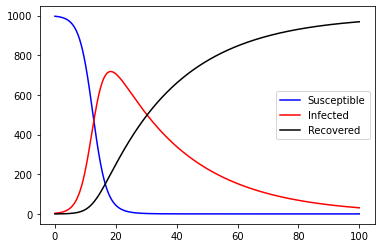

In [2]:
import matplotlib.pyplot as plt

plt.plot(times, sol[:,0], c='b', label='Susceptible')
plt.plot(times, sol[:,1], c='r', label='Infected')
plt.plot(times, sol[:,2], c='k', label='Recovered')
plt.legend()

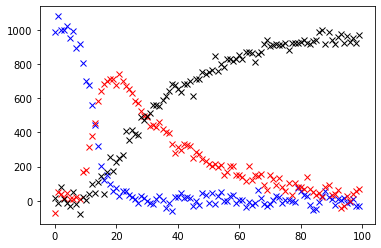

In [3]:
key = jax.random.PRNGKey(0)

# generate some noisy data from sol
ndata = 100
obs_times = times[::10]
var_noise = 1000

data = sol[::10] + jnp.sqrt(var_noise) * jax.random.normal(key, (ndata, sol.shape[1]))

data.shape
plt.plot(obs_times, data[:,0], 'x', c='b')
plt.plot(obs_times, data[:,1], 'x', c='r')
plt.plot(obs_times, data[:,2], 'x', c='k')

In [4]:
# define misfit
def misfit(params):
    # misfit should be ||f(x) - d||^2_C^-1 = (f(x) - d)^T C^-1 (f(x) - d)
    resid = model.forward(params)[::10] - data
    print(resid.shape)
    #return jnp.sum((model.forward(params)[::10] - data)**2) / var_noise

misfit(jnp.array([0.5, 0.04]))

(100, 3)
